# Data Frame Description

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataset

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.shape

(907, 27)

The dataset contains 907 rows and 27 columns

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Checking null values in the dataframe


In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

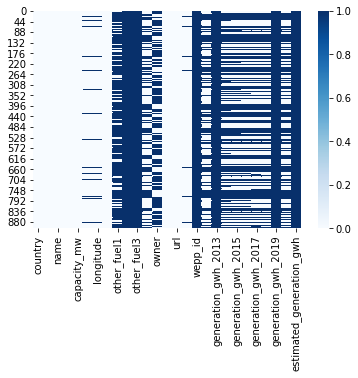

In [7]:
#data visualisation
sns.heatmap(df.isnull(),cmap='Blues')

In [8]:
# Checking Duplicates
df.duplicated().sum()

0

In [9]:
#%age data missing
for i in df.columns:
    print('% data missing in',i,'is:',(df[i].isnull().sum()/df.shape[0])*100)

% data missing in country is: 0.0
% data missing in country_long is: 0.0
% data missing in name is: 0.0
% data missing in gppd_idnr is: 0.0
% data missing in capacity_mw is: 0.0
% data missing in latitude is: 5.071664829106946
% data missing in longitude is: 5.071664829106946
% data missing in primary_fuel is: 0.0
% data missing in other_fuel1 is: 78.16979051819185
% data missing in other_fuel2 is: 99.88974641675854
% data missing in other_fuel3 is: 100.0
% data missing in commissioning_year is: 41.89636163175303
% data missing in owner is: 62.29327453142227
% data missing in source is: 0.0
% data missing in url is: 0.0
% data missing in geolocation_source is: 2.0948180815876514
% data missing in wepp_id is: 100.0
% data missing in year_of_capacity_data is: 42.77839029768467
% data missing in generation_gwh_2013 is: 100.0
% data missing in generation_gwh_2014 is: 56.119073869900774
% data missing in generation_gwh_2015 is: 53.47298787210585
% data missing in generation_gwh_2016 is: 52.

In [10]:
#filling the value in year
year=['commissioning_year','year_of_capacity_data']
for i in year:    
    df[i] = df[i].fillna(df[i].mode()[0])

In [11]:
#converting float data type in yeat to int32
year=['commissioning_year','year_of_capacity_data']
for i in year:    
    df[i]=df[i].astype('int32')
df.dtypes    

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year            int32
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data         int32
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [12]:
#extracting the categorical part of gppd_inr
from string import digits

#Removing tab spaces
df['gppd_idnr'] = df['gppd_idnr'].str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
df['gppd_idnr']= df['gppd_idnr'].str.translate(remove_digits)

#Removing leading and trailling spaces
df['gppd_idnr'] = df['gppd_idnr'].str.strip()

In [13]:
df['gppd_idnr'].unique()

array(['WRI', 'IND'], dtype=object)

In [14]:
#dropping columns unnecessary columns and columns with more than 90% of data missing

df.drop(['country_long','name','other_fuel1','other_fuel2','other_fuel3','owner','url','source','wepp_id','geolocation_source','gppd_idnr','generation_data_source','estimated_generation_gwh','generation_gwh_2019','generation_gwh_2013'],axis=1,inplace=True)

# Exploratory Data Analysis:

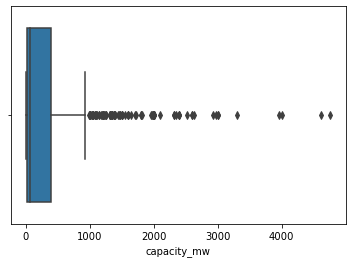

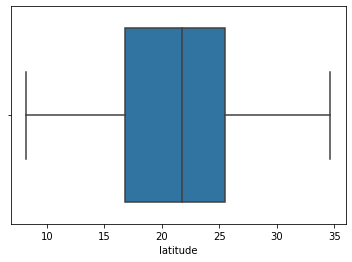

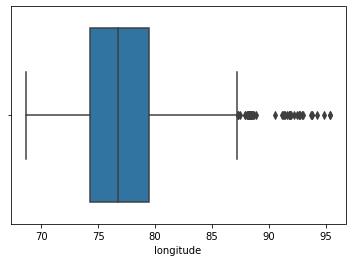

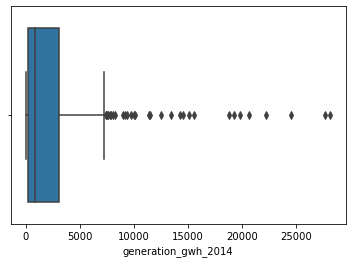

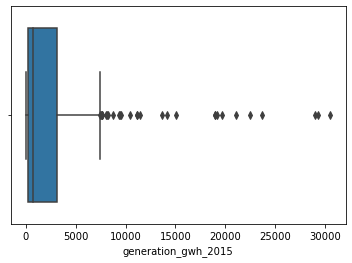

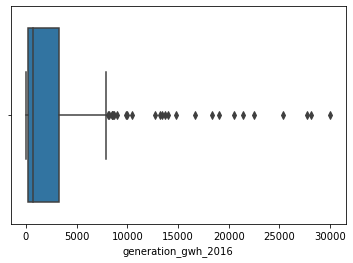

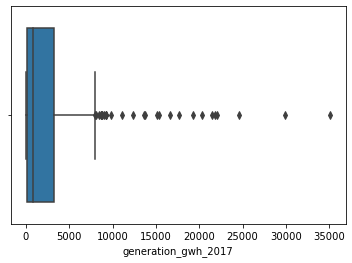

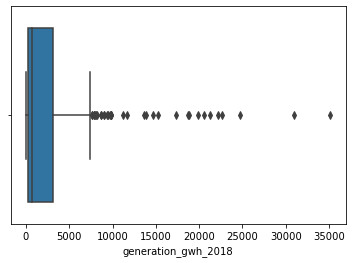

In [15]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.boxplot(x=i,data=df)
        plt.show()    

Observation:

1.Maximum electrical generating capacity in megawatts is around 5000.

2.Maximum electricity generation in gigawatt-hours reported for the year 2014 is around 27000.

3.Maximum electricity generation in gigawatt-hours reported for the year 2015 is around 30000.

3.Maximum electricity generation in gigawatt-hours reported for the year 2016 is around 30000.

4,3.Maximum electricity generation in gigawatt-hours reported for the year 2015 is around 35000.

3.Maximum electricity generation in gigawatt-hours reported for the year 2015 is around 35000.

# Univariate Analysis(Categorical Data):

In [17]:
for i in df.columns:
    if (df[i].dtypes=='object'):
        print(f'================================{i}===================================')
        print(df[i].value_counts())
        print('\n')

================================country===================================
IND    907
Name: country, dtype: int64


================================primary_fuel===================================
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64




# Bivariate Analysis:

In [18]:
pd.set_option('display.max_rows',167)
df['country'].value_counts().head(167)


IND    907
Name: country, dtype: int64

In [19]:
df['country'].unique()

array(['IND'], dtype=object)

In [20]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

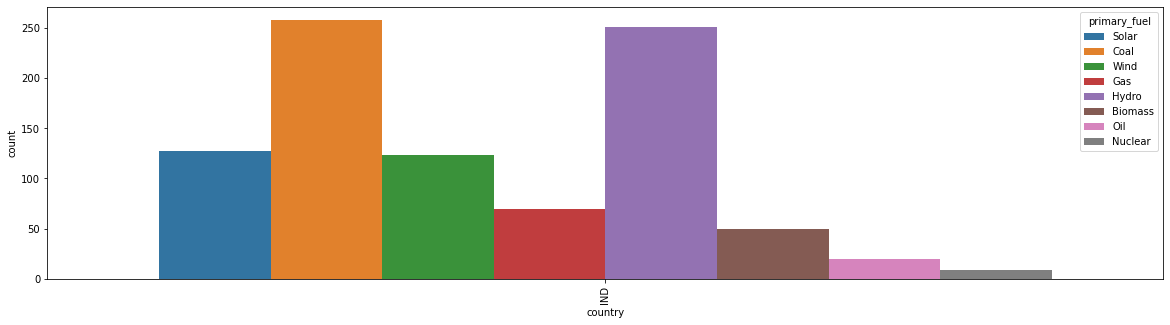

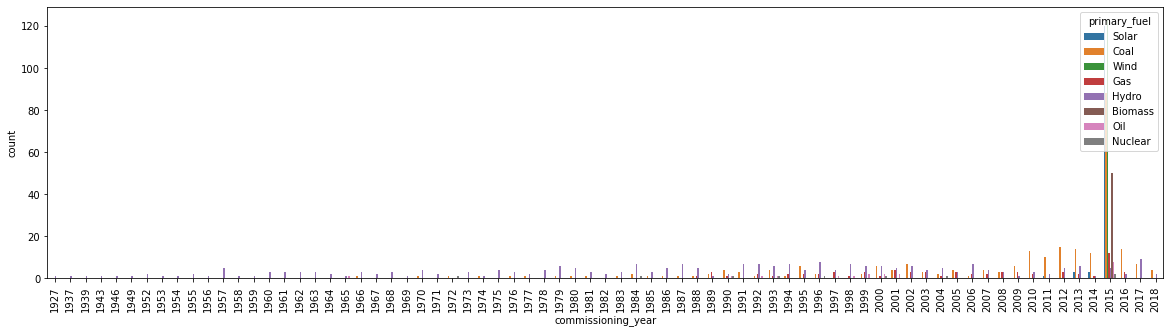

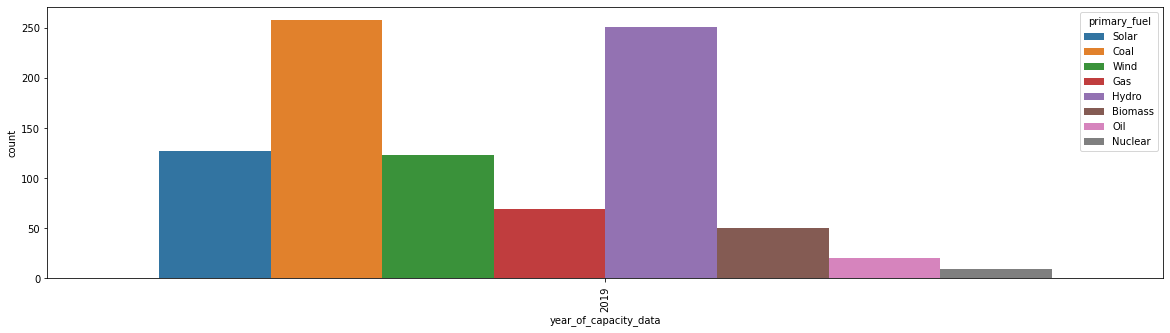

In [21]:
cat=['country','commissioning_year','year_of_capacity_data']
for i in cat:
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    sns.countplot(x=i,hue='primary_fuel',data=df)
    plt.show()

Observation:
    
1.Maximum plant started operation around 2015.

2.In the year 2019 the maximum capacity information was reported was for coal and hydro type of primary fuel.

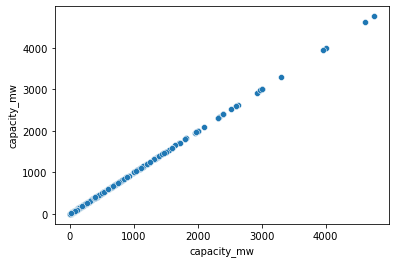

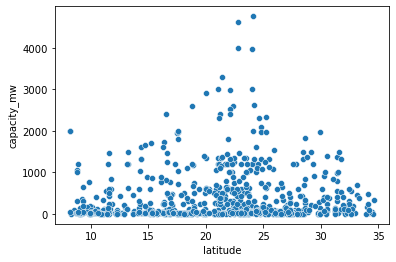

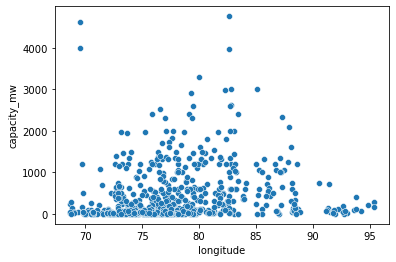

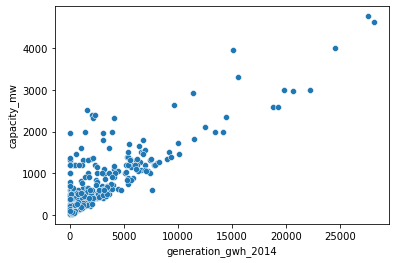

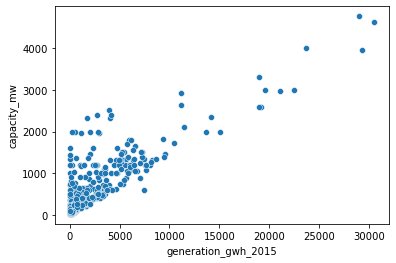

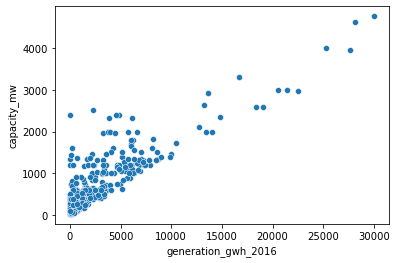

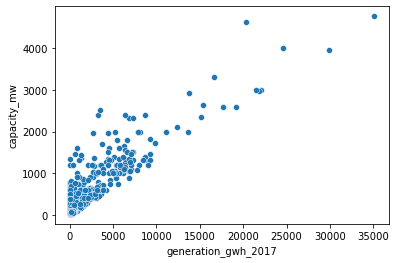

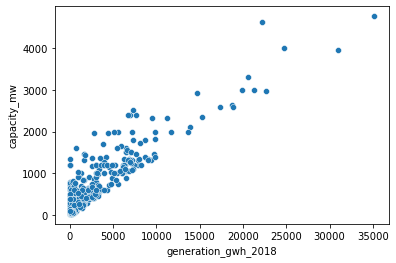

In [22]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.scatterplot(y='capacity_mw',x=i,data=df)
        plt.show()                               

Observation:

1.Longitude and latitude dont show any trend with the target.

2.With increase in generation_gwh the capacity_mw increases

# Data Set Description

In [23]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,907.000000,907.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,2004.594267,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,15.734928,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1998.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2014.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2015.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


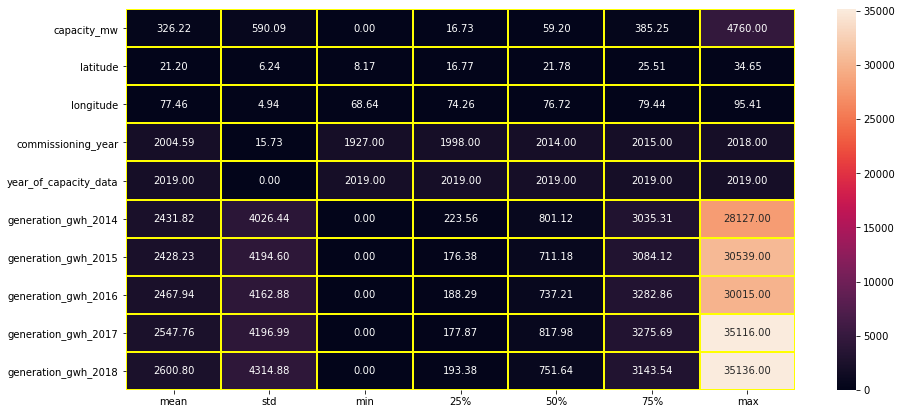

In [24]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Observation:
Outliers might be in all generation_gwh feature as there is huge difference between 75% and max.

Also mean is greater than the median indicating right skewed data.

# Filling Missing Values

In [25]:
#filling missing numerical value
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        df[i]=df[i].fillna(np.mean(df[i]))
df

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,2.5,28.1839,73.2407,Solar,2011,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,IND,98.0,24.7663,74.6090,Coal,2015,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,IND,39.2,21.9038,69.3732,Wind,2015,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,IND,135.0,23.8712,91.3602,Gas,2004,2019,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,1800.0,21.9603,82.4091,Coal,2015,2019,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,1600.0,16.2949,77.3568,Coal,2016,2019,2431.823590,0.994875,233.596650,865.400000,686.500000
903,IND,3.0,12.8932,78.1654,Solar,2015,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,IND,25.5,15.2758,75.5811,Wind,2015,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,IND,80.0,24.3500,73.7477,Coal,2015,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [26]:
#filling missing categoical value
for i in df.columns:
    if (df[i].dtypes=='object'):
        df[i] = df[i].fillna(df[i].mode()[0])
df

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,2.5,28.1839,73.2407,Solar,2011,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,IND,98.0,24.7663,74.6090,Coal,2015,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,IND,39.2,21.9038,69.3732,Wind,2015,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,IND,135.0,23.8712,91.3602,Gas,2004,2019,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,1800.0,21.9603,82.4091,Coal,2015,2019,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,1600.0,16.2949,77.3568,Coal,2016,2019,2431.823590,0.994875,233.596650,865.400000,686.500000
903,IND,3.0,12.8932,78.1654,Solar,2015,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,IND,25.5,15.2758,75.5811,Wind,2015,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,IND,80.0,24.3500,73.7477,Coal,2015,2019,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


# Label Encoding target column

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['primary_fuel']=le.fit_transform(df['primary_fuel'].values.reshape(-1,1))

# Correlation

In [29]:
df.corr()['capacity_mw'].sort_values()

primary_fuel            -0.380395
commissioning_year      -0.004072
latitude                 0.050984
longitude                0.195882
generation_gwh_2014      0.694350
generation_gwh_2015      0.711190
generation_gwh_2016      0.742221
generation_gwh_2017      0.757585
generation_gwh_2018      0.773456
capacity_mw              1.000000
year_of_capacity_data         NaN
Name: capacity_mw, dtype: float64

<AxesSubplot:>

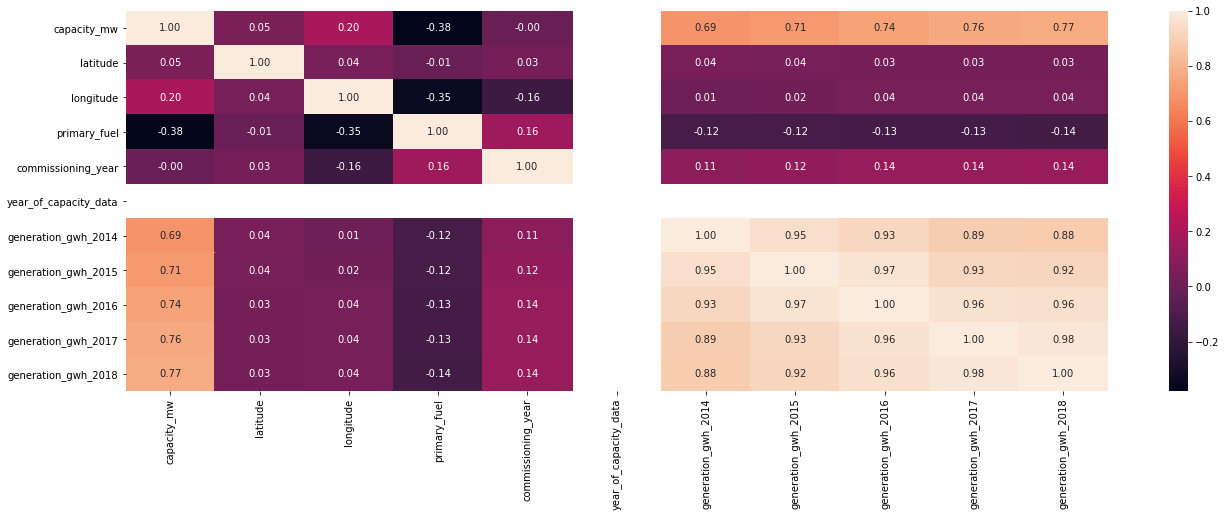

In [30]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='yellow')

Observation:
    
capacity_mw is highly correlated with generation_gwh_2018 and least with latitude.

# Checking Skewness

In [31]:
df.skew()

capacity_mw              3.123576
latitude                -0.149698
longitude                1.141881
primary_fuel             0.472251
commissioning_year      -1.714873
year_of_capacity_data    0.000000
generation_gwh_2014      5.035446
generation_gwh_2015      5.364134
generation_gwh_2016      5.068427
generation_gwh_2017      5.110952
generation_gwh_2018      4.937907
dtype: float64

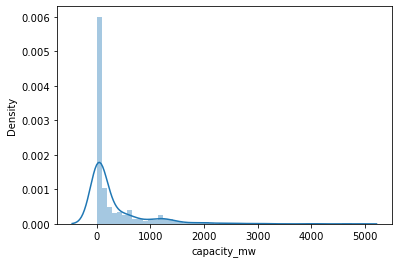

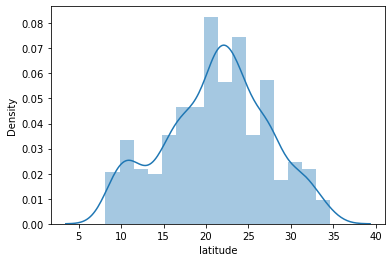

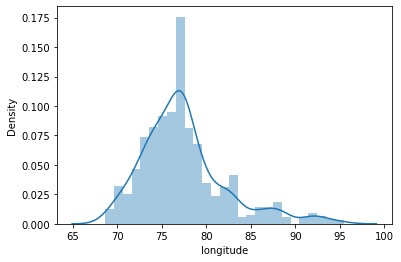

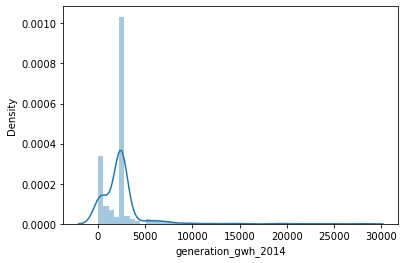

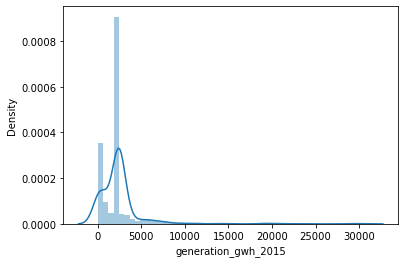

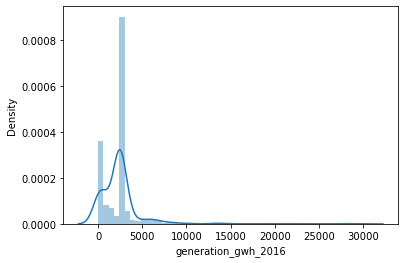

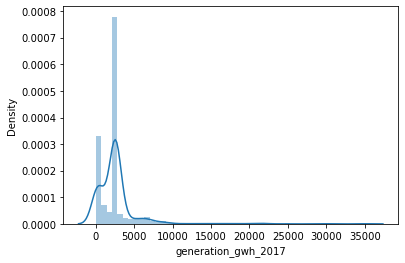

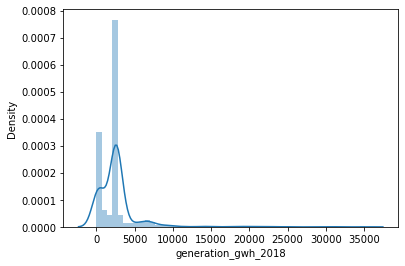

In [32]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.distplot(df[i])
        plt.show()

Observation:
Except latitude all continuous features are right skewed.All generation_gwh feature are highly skewed.

# Outliers Checking:

capacity_mw                 AxesSubplot(0.125,0.772143;0.227941x0.107857)
latitude                 AxesSubplot(0.398529,0.772143;0.227941x0.107857)
longitude                AxesSubplot(0.672059,0.772143;0.227941x0.107857)
primary_fuel                AxesSubplot(0.125,0.642714;0.227941x0.107857)
commissioning_year       AxesSubplot(0.398529,0.642714;0.227941x0.107857)
year_of_capacity_data    AxesSubplot(0.672059,0.642714;0.227941x0.107857)
generation_gwh_2014         AxesSubplot(0.125,0.513286;0.227941x0.107857)
generation_gwh_2015      AxesSubplot(0.398529,0.513286;0.227941x0.107857)
generation_gwh_2016      AxesSubplot(0.672059,0.513286;0.227941x0.107857)
generation_gwh_2017         AxesSubplot(0.125,0.383857;0.227941x0.107857)
generation_gwh_2018      AxesSubplot(0.398529,0.383857;0.227941x0.107857)
dtype: object

<Figure size 1080x360 with 0 Axes>

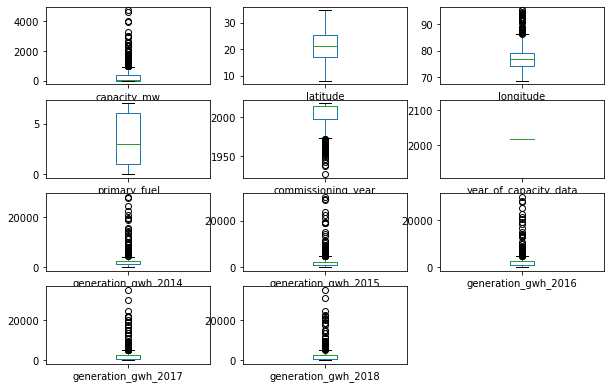

In [33]:
plt.figure(figsize=(15,5))
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,10))


Observation:
    
Except latitude and capacit_mw(target) all continuous featues have outliers present and need to be removed.

# Data Preprocessing

# REMOVING OUTLIERS:

In [34]:
#using quantile method
out=['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for i in out:
    ub=df[i].quantile(0.99)
    lb=df[i].quantile(0.01)
    print(i)
    print('upper bound:',ub)
    print('lower bound:',lb)
    print('\n')

latitude
upper bound: 34.001324
lower bound: 8.76707


longitude
upper bound: 92.70831999999999
lower bound: 69.529606


generation_gwh_2014
upper bound: 15033.119999999964
lower bound: 0.0


generation_gwh_2015
upper bound: 18729.39999999977
lower bound: 0.0


generation_gwh_2016
upper bound: 16555.187999999893
lower bound: 0.0


generation_gwh_2017
upper bound: 16527.852577999925
lower bound: 0.0


generation_gwh_2018
upper bound: 18618.056545999923
lower bound: 0.0




In [35]:
df_new=df[(df['latitude']<=34.00)&(df['latitude']>=8.76)]

In [36]:
df_new=df[(df['longitude']<=92.70)&(df['longitude']>=69.52)]

In [37]:
df_new=df[(df['generation_gwh_2014']<=15033.11)&(df['generation_gwh_2014']>=0)]

In [38]:
df_new=df[(df['generation_gwh_2015']<=18729.39)&(df['generation_gwh_2015']>=0)]

In [39]:
df_new=df[(df['generation_gwh_2016']<=16555.18)&(df['generation_gwh_2016']>=0)]

In [40]:
df_new=df[(df['generation_gwh_2017']<=16527.85)&(df['generation_gwh_2017']>=0)]

In [41]:
df_new=df[(df['generation_gwh_2018']<=18618.05)&(df['generation_gwh_2018']>=0)]

In [42]:
df_new.shape[0]

897

In [43]:
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
data_loss

1.1025358324145533

Since only 1% data is lost due to ouliers removal we can consider to remove outliers

In [44]:
df=df_new

# Converting string data to numeric data

In [45]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

# Skewness Treatment:

In [46]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [47]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.        ,  1.15545764, -0.95408068, ...,  0.35373138,
         0.34998415,  0.36067825],
       [ 0.        ,  0.58025806, -0.54070918, ...,  0.35373138,
         0.34998415,  0.36067825],
       [ 0.        ,  0.10452447, -2.41101677, ...,  0.35373138,
         0.34998415,  0.36067825],
       ...,
       [ 0.        , -0.97202028, -0.27351496, ...,  0.35373138,
         0.34998415,  0.36067825],
       [ 0.        ,  0.51071358, -0.79553213, ...,  0.35373138,
         0.34998415,  0.36067825],
       [ 0.        , -1.80718018,  0.19201045, ...,  0.35373138,
         0.34998415,  0.36067825]])

In [48]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.        , 0.74478977, 0.34289819, ..., 0.39029925, 0.40088469,
        0.41943873],
       [0.        , 0.61216795, 0.42211789, ..., 0.39029925, 0.40088469,
        0.41943873],
       [0.        , 0.50247968, 0.06368678, ..., 0.39029925, 0.40088469,
        0.41943873],
       ...,
       [0.        , 0.25426442, 0.47332376, ..., 0.39029925, 0.40088469,
        0.41943873],
       [0.        , 0.59613332, 0.37328289, ..., 0.39029925, 0.40088469,
        0.41943873],
       [0.        , 0.06170444, 0.56253839, ..., 0.39029925, 0.40088469,
        0.41943873]])

In [49]:
x.shape

(897, 11)

# Dimension reduction using PCA

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca=PCA(n_components=5)

In [52]:
x=pca.fit_transform(x)

In [53]:
x

array([[ 0.1878466 ,  0.38618143,  0.24222168,  0.00384208,  0.04239506],
       [ 0.19731391, -0.22526256,  0.11272655, -0.20667721,  0.14041712],
       [ 0.24976847,  0.55268093, -0.01639345, -0.0556372 ,  0.26600835],
       ...,
       [ 0.18613463,  0.40989583, -0.25657855,  0.01852197, -0.11019411],
       [ 0.20256679, -0.21045059,  0.09624422, -0.20967674,  0.18636621],
       [ 0.16519306,  0.37208943, -0.44584262,  0.05240515, -0.18878791]])

In [54]:
x.shape

(897, 5)

# Predicting capacity_mw

# Model Building:

In [55]:
# Since our target is continuous variable we will use regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if round(r2_score(y_train,train_pred),1)==round(r2_score(y_test,test_pred),1):
        print('training score :',r2_score(y_train,train_pred))
        print('testing score :',r2_score(y_test,test_pred))
        print('At random_state=',i,"the model performs well",'\n')

training score : 0.3411652695760501
testing score : 0.34831937924808576
At random_state= 1 the model performs well 

training score : 0.34716997300218244
testing score : 0.3367435328746593
At random_state= 4 the model performs well 

training score : 0.34950143683532475
testing score : 0.3329322342308324
At random_state= 28 the model performs well 

training score : 0.3441566559680491
testing score : 0.341368135142856
At random_state= 37 the model performs well 

training score : 0.34463661597938755
testing score : 0.34656576527634475
At random_state= 45 the model performs well 

training score : 0.3433969474145091
testing score : 0.34906310866605805
At random_state= 48 the model performs well 

training score : 0.34833384191428085
testing score : 0.3402996288786394
At random_state= 59 the model performs well 

training score : 0.34879144468469225
testing score : 0.33500055148859964
At random_state= 64 the model performs well 

training score : 0.3403488996405498
testing score : 0.3197

In [56]:
#selecting random_state =70
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
lr.fit(x_train,y_train)
test_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
print('testing score :',r2_score(y_test,test_pred))
print('training score :',r2_score(y_train,train_pred))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,test_pred))
print('Mean squared error:',mean_squared_error(y_test,test_pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,test_pred)))

testing score : 0.34467488050117845
training score : 0.34508199571776266
Error:
Mean absolue error: 267.07941180600005
Mean squared error: 149939.5684924133
Root Mean squared error: 387.22031002055314


# Cross Validation Of the Model:

In [57]:
from sklearn.model_selection import cross_val_score
for k in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',r2_score(y_train,train_pred))
    print('testing score :',r2_score(y_test,test_pred))
    print('\n')

At crossfold= 2 the cv score is 0.32973953279569906
training score : 0.34508199571776266
testing score : 0.34467488050117845


At crossfold= 3 the cv score is 0.3292746209736583
training score : 0.34508199571776266
testing score : 0.34467488050117845


At crossfold= 4 the cv score is 0.3393629964735019
training score : 0.34508199571776266
testing score : 0.34467488050117845


At crossfold= 5 the cv score is 0.3349840960676258
training score : 0.34508199571776266
testing score : 0.34467488050117845


At crossfold= 6 the cv score is 0.3156798570421386
training score : 0.34508199571776266
testing score : 0.34467488050117845


At crossfold= 7 the cv score is 0.324794299280586
training score : 0.34508199571776266
testing score : 0.34467488050117845


At crossfold= 8 the cv score is 0.325410274125703
training score : 0.34508199571776266
testing score : 0.34467488050117845


At crossfold= 9 the cv score is 0.3082931723925452
training score : 0.34508199571776266
testing score : 0.3446748805011

selecting cv=4 as it is performing better than other values of kfolds 

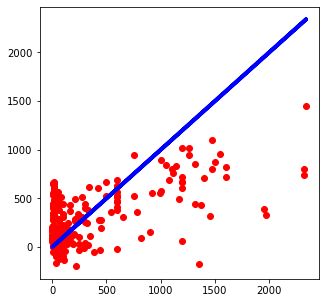

In [58]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,test_pred,color='r')
plt.plot(y_test,y_test,color='b',linewidth='4')
plt.show()

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [60]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for i in model:
    i.fit(x_train,y_train)
    i_pred=i.predict(x_test)
    train_pred=i.predict(x_train)
    print(i)
    print('testing score :',r2_score(y_test,i_pred))
    print('training score :',r2_score(y_train,train_pred))
    from sklearn.model_selection import cross_val_score
    cv_score=cross_val_score(i,x,y)
    cv_mean=cv_score.mean()
    print('the cv score is',cv_mean)
    print('Error:')
    print('Mean absolue error:',mean_absolute_error(y_test,i_pred))
    print('Mean squared error:',mean_squared_error(y_test,i_pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,i_pred)))
    print()
    print()


DecisionTreeRegressor()
testing score : 0.27252059691365094
training score : 0.9999701335980342
the cv score is 0.5218539713021552
Error:
Mean absolue error: 179.19297407407407
Mean squared error: 166448.59862735923
Root Mean squared error: 407.9811253322379


KNeighborsRegressor()
testing score : 0.6218753286523602
training score : 0.7959736087050461
the cv score is 0.6593887603781761
Error:
Mean absolue error: 143.0422925925926
Mean squared error: 86515.6063322591
Root Mean squared error: 294.13535376125583


LinearRegression()
testing score : 0.34467488050117845
training score : 0.34508199571776266
the cv score is 0.3349840960676258
Error:
Mean absolue error: 267.07941180600005
Mean squared error: 149939.5684924133
Root Mean squared error: 387.22031002055314


GradientBoostingRegressor()
testing score : 0.6418528423374392
training score : 0.9114303190658307
the cv score is 0.673274528740946
Error:
Mean absolue error: 155.29798131372578
Mean squared error: 81944.7151938531
Root Mean 

Observation:
    RandomForest,GradientBoosting and KNeighbors model performing well.

# TUNING THE MODEL USING GRID SEARCH CV

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
#tuning random forest model
from sklearn.ensemble import RandomForestRegressor
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[5,10],'n_estimators':[100,200,300,350]}
rf=RandomForestRegressor()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 350}


In [63]:
rf=RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=10)    
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=68)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rfpred))
print('training score :',rf.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

The CV score is: 0.7105440515928689
testing score : 0.6717140095170983
training score : 0.945629677817823
Error:
Mean absolue error: 132.53419821663329
Mean squared error: 57742.16770567581
Root Mean squared error: 240.29600018659448


In [64]:
#kneighbors 
parameters={'n_neighbors':[2,3,5,10,15,20,25,30,35],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
knr=KNeighborsRegressor()
knrg=GridSearchCV(knr,parameters)
knrg.fit(x_train,y_train)
print(knrg.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [65]:
knr=KNeighborsRegressor(n_neighbors=10,algorithm='auto',weights='distance')
knr.fit(x_train,y_train)
knrpred=knr.predict(x_test)
knr.score(x_train,y_train)
cv_score=cross_val_score(knr,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,knrpred))
print('training score :',knr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,knrpred))
print('Mean squared error:',mean_squared_error(y_test,knrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,knrpred)))

The CV score is: 0.6664447820708702
testing score : 0.5877639367515655
training score : 0.9999039655785187
Error:
Mean absolue error: 134.2891835902383
Mean squared error: 72508.13189866673
Root Mean squared error: 269.2733404900432


In [66]:
#tuning gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['squared_error','absolute_error','huber','quantile'],'learning_rate':[0.1,0.001,1,10],'n_estimators':[100,200,300,350]}
gb=GradientBoostingRegressor()
gbrg=GridSearchCV(gb,parameters)
gbrg.fit(x_train,y_train)
print(gbrg.best_params_)

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [67]:
gb=GradientBoostingRegressor(n_estimators=100,loss='huber',learning_rate=0.1)
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
cv_score=cross_val_score(gb,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,gbpred))
print('training score :',gb.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,gbpred))
print('Mean squared error:',mean_squared_error(y_test,gbpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,gbpred)))

The CV score is: 0.6863796190898015
testing score : 0.6295848021003942
training score : 0.8243026620901324
Error:
Mean absolue error: 134.03753119985953
Mean squared error: 65152.26691942593
Root Mean squared error: 255.24942099723935


# Conclusion:

Selecting random forest with default parameters as our final model as it is performing better than the tuned model.

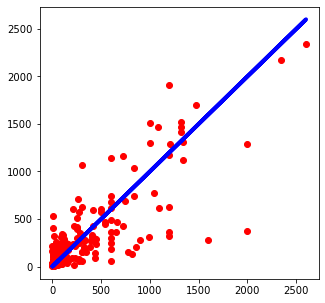

In [68]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,rfpred,color='r')
plt.plot(y_test,y_test,color='b',linewidth='4')
plt.show()

In [69]:
roriginal=np.array(y_test)
rpredicted=np.array(rfpred)
df_comp=pd.DataFrame({'Original':roriginal,'Predicted':rpredicted},index=range(len(roriginal)))
df_comp.sample(10)

,Original,Predicted
105,22.0,146.791025
20,21.0,42.953284
193,440.0,85.738782
246,1094.0,619.767915
82,1.0,214.976767
263,24.0,36.977559
78,1.0,28.517896
267,90.0,239.085648
151,420.0,596.702422
240,231.0,218.385263


# Predicting primary_fuel

In [70]:
#assign the value target and feature
xc = df.drop(['primary_fuel'],axis=1)
yc = df["primary_fuel"]

In [71]:
from sklearn.preprocessing import power_transform
xc=power_transform(xc,method='yeo-johnson')
xc

array([[ 0.        , -1.69165588,  1.15545764, ...,  0.35373138,
         0.34998415,  0.36067825],
       [ 0.        ,  0.21394808,  0.58025806, ...,  0.35373138,
         0.34998415,  0.36067825],
       [ 0.        , -0.27969422,  0.10452447, ...,  0.35373138,
         0.34998415,  0.36067825],
       ...,
       [ 0.        , -0.51287649, -0.97202028, ...,  0.35373138,
         0.34998415,  0.36067825],
       [ 0.        ,  0.10528201,  0.51071358, ...,  0.35373138,
         0.34998415,  0.36067825],
       [ 0.        , -0.74822075, -1.80718018, ...,  0.35373138,
         0.34998415,  0.36067825]])

In [72]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scc=MinMaxScaler()
xc=scc.fit_transform(xc)
xc

array([[0.        , 0.17463911, 0.74478977, ..., 0.39029925, 0.40088469,
        0.41943873],
       [0.        , 0.60725319, 0.61216795, ..., 0.39029925, 0.40088469,
        0.41943873],
       [0.        , 0.49518551, 0.50247968, ..., 0.39029925, 0.40088469,
        0.41943873],
       ...,
       [0.        , 0.442248  , 0.25426442, ..., 0.39029925, 0.40088469,
        0.41943873],
       [0.        , 0.5825836 , 0.59613332, ..., 0.39029925, 0.40088469,
        0.41943873],
       [0.        , 0.38881967, 0.06170444, ..., 0.39029925, 0.40088469,
        0.41943873]])

In [73]:
#dimension reduction using PCA
pca_c=PCA(n_components=5)

In [74]:
xc=pca_c.fit_transform(xc)
xc.shape

(897, 5)

# Model Building

In [75]:
# Since our target is categorical variable we will use classification model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
#finding out the best random state

model = [DecisionTreeClassifier()]
maxaccuracy_score=0
for i in range(0,100):
    xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,test_size=.3,random_state=i)
    for i_c in model:
        i_c.fit(xc_train,yc_train)
        pre_c = i_c.predict(xc_test)
        ac_score = accuracy_score(yc_test,pre_c)
        print("accuracy score correspond to random state " ,i ,"is", ac_score)
        

accuracy score correspond to random state  0 is 0.6592592592592592
accuracy score correspond to random state  1 is 0.725925925925926
accuracy score correspond to random state  2 is 0.6222222222222222
accuracy score correspond to random state  3 is 0.6370370370370371
accuracy score correspond to random state  4 is 0.6444444444444445
accuracy score correspond to random state  5 is 0.6925925925925925
accuracy score correspond to random state  6 is 0.6703703703703704
accuracy score correspond to random state  7 is 0.674074074074074
accuracy score correspond to random state  8 is 0.674074074074074
accuracy score correspond to random state  9 is 0.6777777777777778
accuracy score correspond to random state  10 is 0.6703703703703704
accuracy score correspond to random state  11 is 0.725925925925926
accuracy score correspond to random state  12 is 0.6703703703703704
accuracy score correspond to random state  13 is 0.6851851851851852
accuracy score correspond to random state  14 is 0.67037037037

In [77]:
#selecting random state=11
dtc=DecisionTreeClassifier()
xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,random_state=11,test_size=0.30)
dtc.fit(xc_train,yc_train)
pred_train=dtc.predict(xc_train)
pred_test=dtc.predict(xc_test)
print('Training Accuracy Score is:',round(accuracy_score(yc_train,pred_train)*100,1))
print('Testing Accuracy Score is:',round(accuracy_score(yc_test,pred_test)*100,1))

Training Accuracy Score is: 100.0
Testing Accuracy Score is: 73.0


# CROSS VALIDATION OF THE MODEL

In [78]:
from sklearn.model_selection import cross_val_score
for k in range(2,25):
    cv_score=cross_val_score(dtc,xc,yc,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',accuracy_score(yc_train,pred_train))
    print('testing score :',accuracy_score(yc_test,pred_test))
    print('\n')

At crossfold= 2 the cv score is 0.6621783526885141
training score : 1.0
testing score : 0.7296296296296296


At crossfold= 3 the cv score is 0.6376811594202899
training score : 1.0
testing score : 0.7296296296296296


At crossfold= 4 the cv score is 0.6744593253968254
training score : 1.0
testing score : 0.7296296296296296


At crossfold= 5 the cv score is 0.669993792675357
training score : 1.0
testing score : 0.7296296296296296


At crossfold= 6 the cv score is 0.6722595078299776
training score : 1.0
testing score : 0.7296296296296296


At crossfold= 7 the cv score is 0.6789521040974529
training score : 1.0
testing score : 0.7296296296296296


At crossfold= 8 the cv score is 0.6789763748419722
training score : 1.0
testing score : 0.7296296296296296


At crossfold= 9 the cv score is 0.6656228956228956
training score : 1.0
testing score : 0.7296296296296296


At crossfold= 10 the cv score is 0.6699875156054932
training score : 1.0
testing score : 0.7296296296296296


At crossfold= 11 th

In [79]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),AdaBoostClassifier(),SVC()]
for i in model:
    i.fit(xc_train,yc_train)
    i_pred=i.predict(xc_test)
    train_pred=i.predict(xc_train)
    print(i)
    print('testing score :',accuracy_score(yc_test,i_pred))
    print('training score :',accuracy_score(yc_train,train_pred))

    print()


DecisionTreeClassifier()
testing score : 0.7185185185185186
training score : 1.0

KNeighborsClassifier()
testing score : 0.7555555555555555
training score : 0.7974481658692185

GradientBoostingClassifier()
testing score : 0.7185185185185186
training score : 1.0

RandomForestClassifier()
testing score : 0.7444444444444445
training score : 1.0

AdaBoostClassifier()
testing score : 0.4
training score : 0.43859649122807015

SVC()
testing score : 0.6518518518518519
training score : 0.7097288676236044



Observation: Random Forest and Kneighbors are the best performing models

# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [80]:
#tuning random forest model
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rfc=RandomForestClassifier()
rfcg=GridSearchCV(rf,parameters)
rfg .fit(xc_train,yc_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}


In [81]:
rfc=RandomForestClassifier(max_depth=10,max_features='sqrt',n_estimators=300)
rfc.fit(xc_train,yc_train)
rfc_pred=rfc.predict(xc_test)
train_pred=rfc.predict(xc_train)
print('testing score :',accuracy_score(yc_test,rfc_pred))
print('training score :',accuracy_score(yc_train,train_pred))
cv_score=cross_val_score(rfc,xc,yc,cv=25) #selecting cv=25
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)

testing score : 0.7407407407407407
training score : 0.9904306220095693
the cv score is 0.7424444444444444


In [82]:
#kneighbors 
parameters={'n_neighbors':[2,3,5,10,15,20,25,30,35],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
knc=KNeighborsClassifier()
kncg=GridSearchCV(knc,parameters)
kncg.fit(xc_train,yc_train)
print(kncg.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [83]:
knc=KNeighborsClassifier(algorithm='auto',weights='distance',n_neighbors=10)
knc.fit(xc_train,yc_train)
knc_pred=knc.predict(xc_test)
train_pred=knc.predict(xc_train)
print('testing score :',accuracy_score(yc_test,knc_pred))
print('training score :',accuracy_score(yc_train,train_pred))
cv_score=cross_val_score(knc,xc,yc,cv=25) #selecting cv=25
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)

testing score : 0.7666666666666667
training score : 1.0
the cv score is 0.7480634920634921


# CONCLUSION:

Selecting Kneighbors as our final model as the model is performing extremely well.

# ROC AUC SCORE

In [84]:
knc_proba=knc.predict_proba(xc_test)

In [85]:
from sklearn.metrics import roc_auc_score
roc_auc_score(yc_test,knc_proba,multi_class='ovo')

0.866925439777075

In [89]:
original=np.array(yc_test)
predicted=np.array(knc_pred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted},index=range(len(original)))
df_com.head(10)

,Original,Predicted
0,6,6
1,1,1
2,1,1
3,3,3
4,7,7
5,3,3
6,1,1
7,1,1
8,7,7
9,2,1


# SAVING BEST MODEL

In [87]:
#for capacity_mw
import joblib
joblib.dump(rf,'rffile.obj')

['rffile.obj']

In [88]:
#for primary fuel
joblib.dump(knc,'kncfile.obj')

['kncfile.obj']